<a href="https://colab.research.google.com/github/AVZERO/appexapp/blob/master/128_225cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=3b25e678ff3242bf6d33fcf339c27cf447781f33b37c0316e4bb1eaa3054cbf0
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AARON.jpg to AARON.jpg


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


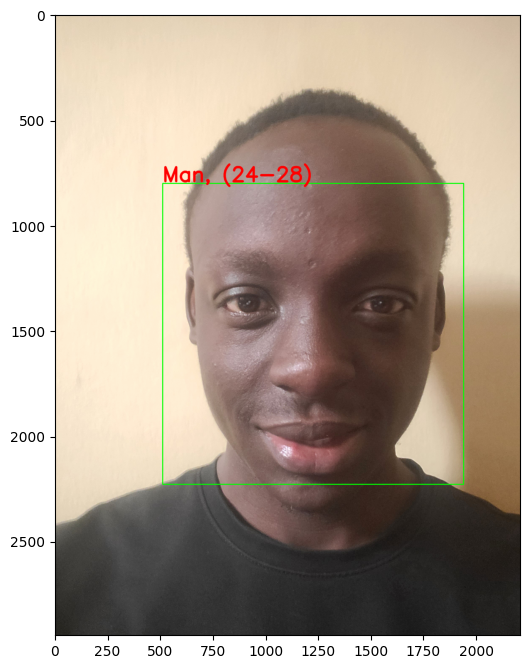

In [10]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Loading image
image_path = "AARON.jpg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting to RGB for proper visualization

# detect age & gender
results = DeepFace.analyze(img_path=image_path, actions=['age', 'gender'], enforce_detection=False)

# Geting face coordinates
face_box = results[0]["region"]
x, y, w, h = face_box["x"], face_box["y"], face_box["w"], face_box["h"]

# Drawing bounding box (green)
cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display predicted gender and age
predicted_text = f"{results[0]['dominant_gender'].capitalize()}, ({results[0]['age']-2}-{results[0]['age']+2})"
cv2.putText(img_rgb, predicted_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 3.2, (255, 0, 0), 9, cv2.LINE_AA)

# Displaying
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.show()
